In [36]:
from PIL import Image
import glob

print("Success imort PIL lib")

def resize_images(img_path):
    images=glob.glob

Success imort PIL lib


In [37]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

In [38]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

300  images to be resized.
300  images resized.
가위 이미지 resize 완료!


In [4]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("rock 이미지 resize 완료!")

300  images to be resized.
300  images resized.
rock 이미지 resize 완료!


In [5]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("paper 이미지 resize 완료!")

300  images to be resized.
300  images resized.
paper 이미지 resize 완료!


In [40]:
import numpy as np

def load_data(img_path, number_of_data=900):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print(np.max(x_train_norm), np.min(x_train_norm))
print("y_train shape: {}".format(y_train.shape))


학습데이터(x_train)의 이미지 개수는 900 입니다.
x_train shape: (900, 28, 28, 3)
0.8666666666666667 0.0
y_train shape: (900,)


라벨:  0


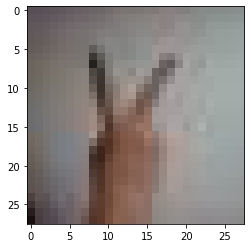

In [25]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# 딥러닝 네트워크 설계하기

In [30]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

In [32]:

print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
#print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
#x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
#print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))


Before Reshape - x_train_norm shape: (900, 28, 28, 3)
After Reshape - x_train_reshaped shape: (900, 28, 28, 3)


In [33]:

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)


Epoch 1/10
29/29 [==============================] - 3s 6ms/step - loss: 1.0653 - accuracy: 0.4244
Epoch 2/10
29/29 [==============================] - 0s 3ms/step - loss: 0.9370 - accuracy: 0.6678
Epoch 3/10
29/29 [==============================] - 0s 3ms/step - loss: 0.6690 - accuracy: 0.8222
Epoch 4/10
29/29 [==============================] - 0s 3ms/step - loss: 0.3894 - accuracy: 0.8811
Epoch 5/10
29/29 [==============================] - 0s 3ms/step - loss: 0.2375 - accuracy: 0.9500
Epoch 6/10
29/29 [==============================] - 0s 3ms/step - loss: 0.1753 - accuracy: 0.9567
Epoch 7/10
29/29 [==============================] - 0s 3ms/step - loss: 0.1314 - accuracy: 0.9667
Epoch 8/10
29/29 [==============================] - 0s 3ms/step - loss: 0.0898 - accuracy: 0.9867
Epoch 9/10
29/29 [==============================] - 0s 3ms/step - loss: 0.0667 - accuracy: 0.9867
Epoch 10/10
29/29 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.9911


In [35]:
# test data 만들어주기

# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test_rock"
resize_images(image_dir_path)
print("test_rock 이미지 resize 완료!", end='\n\n')

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test_scissor"
resize_images(image_dir_path)
print("test_scissor 이미지 resize 완료!", end='\n\n')

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test_paper"
resize_images(image_dir_path)
print("test_paper 이미지 resize 완료!", end='\n\n')


100  images to be resized.
100  images resized.
test_rock 이미지 resize 완료!

100  images to be resized.
100  images resized.
test_scissor 이미지 resize 완료!

100  images to be resized.
100  images resized.
test_paper 이미지 resize 완료!



In [39]:
def load_test_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/test_scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/test_rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/test_paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
print(image_dir_path)
(x_test, y_test)=load_test_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_test.shape))

/aiffel/aiffel/rock_scissor_paper
학습데이터(x_test)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


In [42]:

print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_test_norm shape: (300, 28, 28, 3)
After Reshape - x_test_reshaped shape: (300, 28, 28, 3)


In [43]:

test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


10/10 - 0s - loss: 0.1883 - accuracy: 0.9133
test_loss: 0.18828065693378448 
test_accuracy: 0.9133333563804626


TEST ACCURACY가 상대적으로 높아서 적어놓습니다.

저는 학습 데이터를 다음과 같은 제한 조건을 주고 준비했습니다.
https://wannabe-professional-programmer.tistory.com/43

- 위치 : 손을 밑에서 위로 뻗는 형식
- 배경 : 흰 배경에서 주변에 다른 물체가 보이지 않도록 최대한 노력

다음과 같은 사진을 


In [ ]:
# 성능 개선 방향 1. 학습 데이터의 픽셀을 높여본다.

- 기존의 학습데이터는 224*224 이미지 크기에서 28*28 로 줄여지므로